<a href="https://colab.research.google.com/github/Rajnishmaurya/ML-/blob/main/Naive_Bayes_vs_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [6]:
url='https://raw.githubusercontent.com/Rajnishmaurya/ML-/main/diabetes.csv'
data=pd.read_csv(url)   # Reading the data

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()   # Pandas describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there are few data for columns Glucose,Blood Pressure, Skin thickness, Insulin, BMI which have values as 0. That is not possible. Let's deal with that. We can either remove such data or simply replace it with their respective mean values.

In [10]:
# replacing zeros value with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-13-1ce02280a899>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-13-1ce02280a899>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-13-1ce02280a899>:9: UserWarning: 

`distplot` is a deprecated function and will be removed 

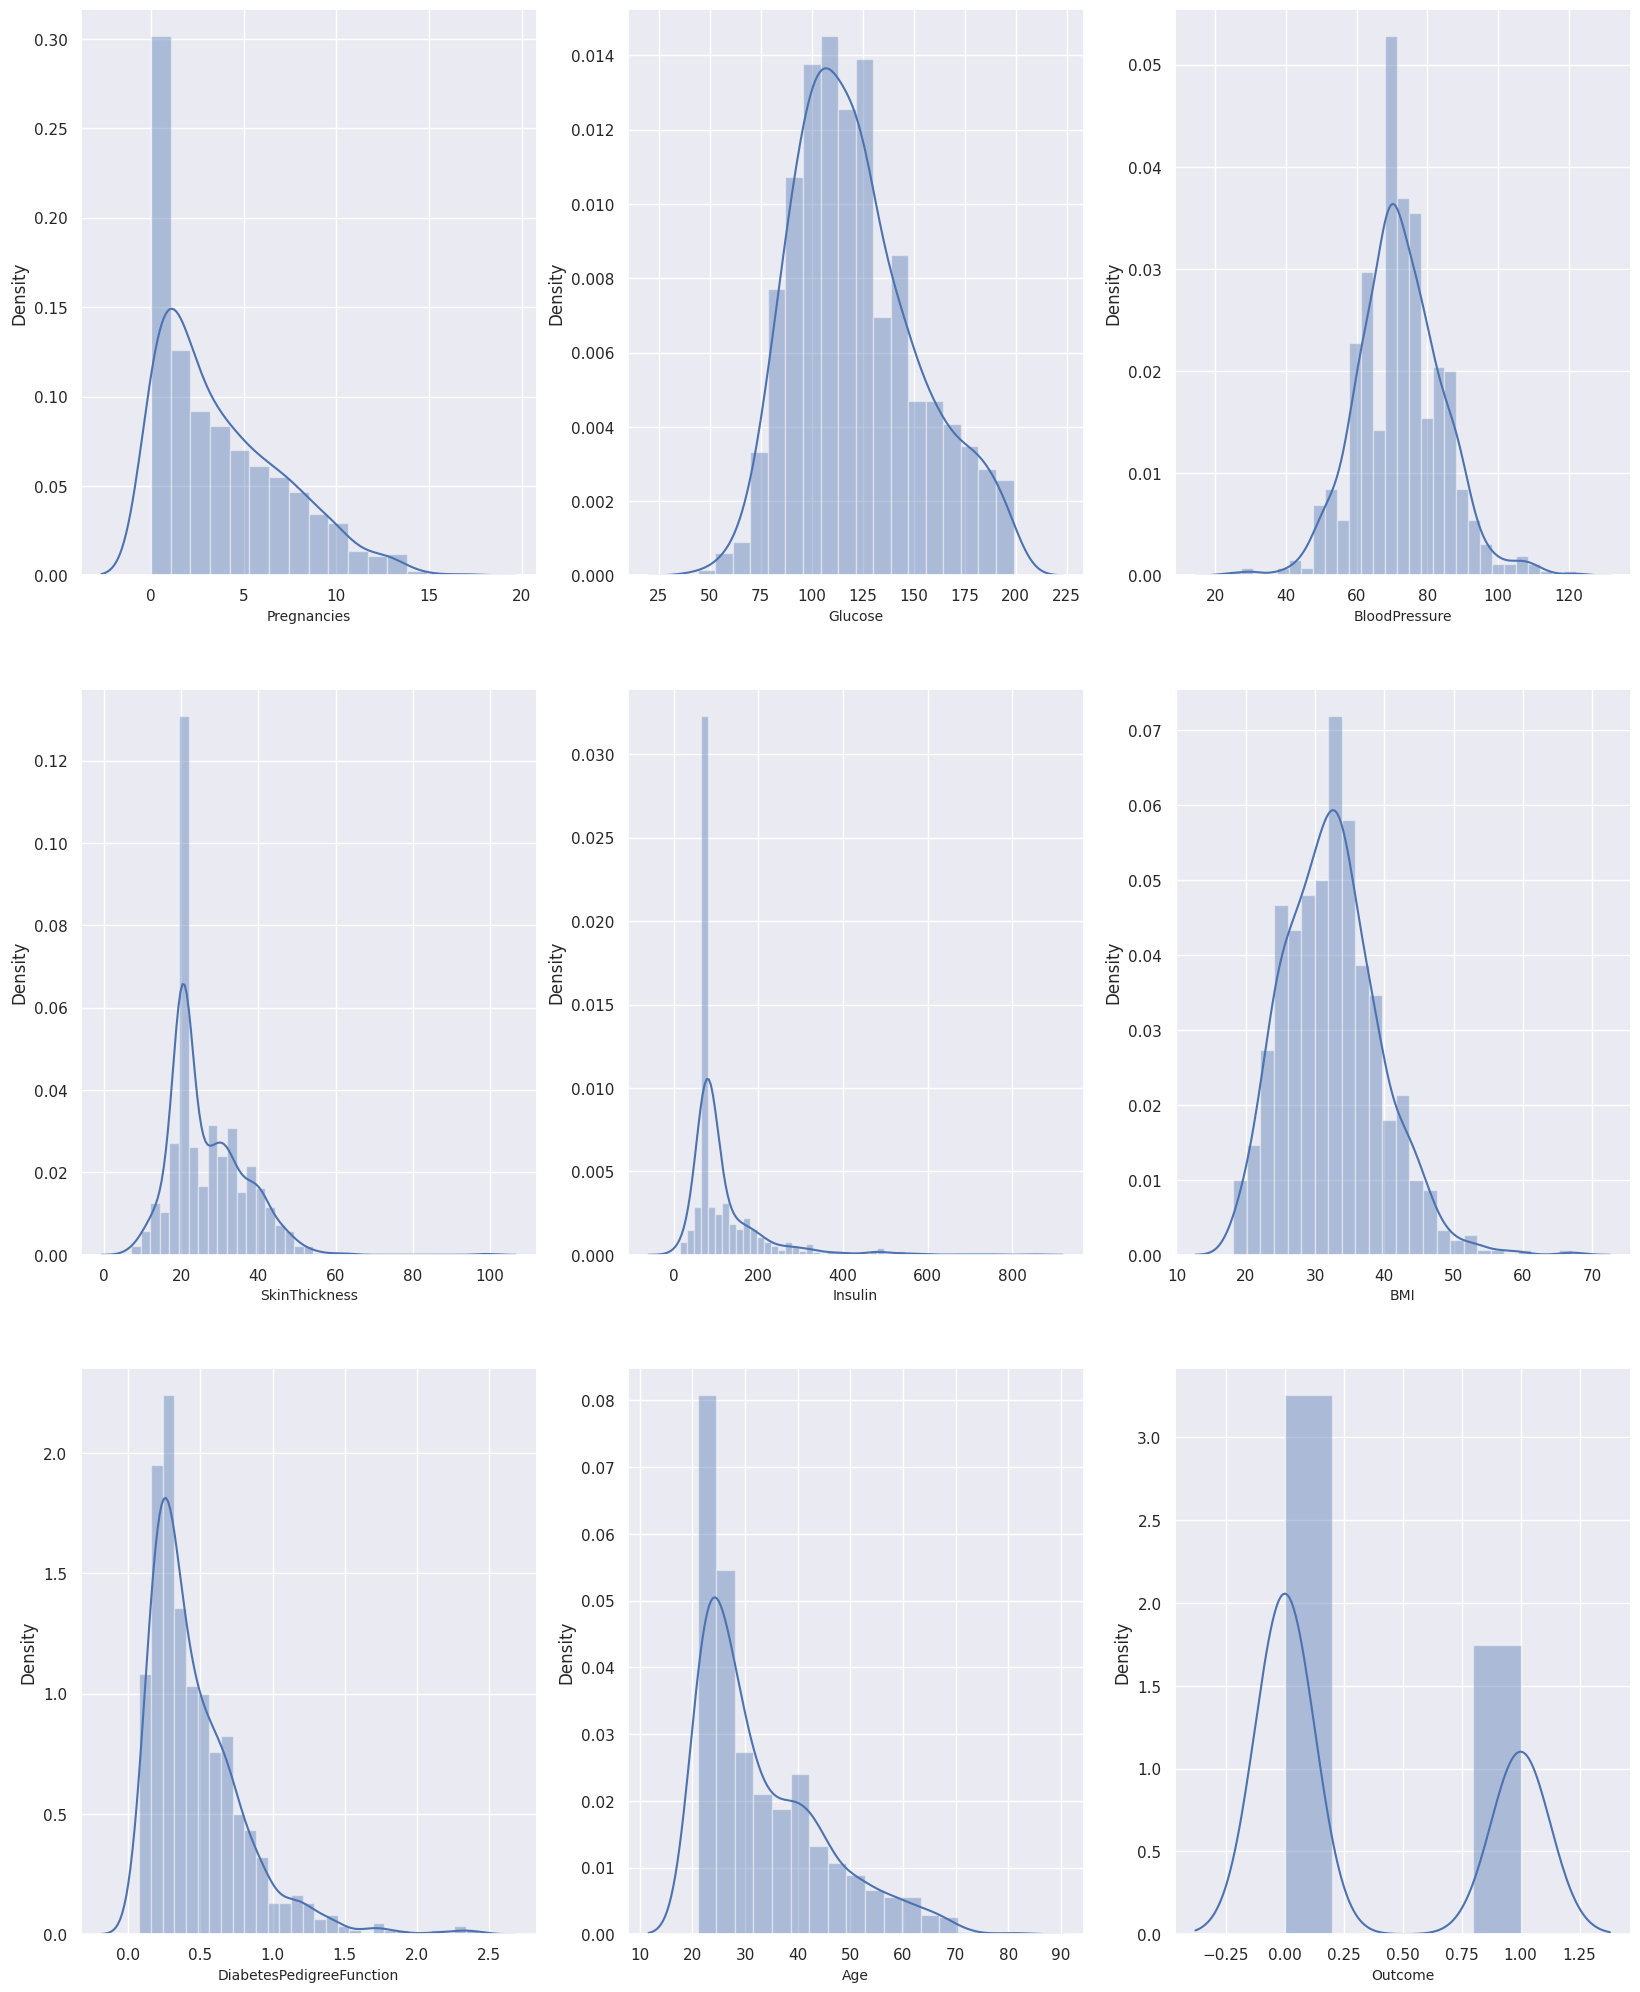

In [13]:
# let's see how data is distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.columns:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize=10)
  plotnumber+=1
plt.show()

In [14]:
# Handling the outliers

q=data['Pregnancies'].quantile(0.98) # we are removing the top 2% data from the Pregnancies column
data_cleaned=data[data['Pregnancies']<q]


q=data_cleaned['BMI'].quantile(0.99) # we are removing the top 1% data from the BMI column
data_cleaned=data[data['BMI']<q]


q=data_cleaned['SkinThickness'].quantile(0.99) # we are removing the top 1% data from the Sknthickness column
data_cleaned=data[data['SkinThickness']<q]


q=data_cleaned['Insulin'].quantile(0.95) # we are removing the top 5% data from the INSULIN column
data_cleaned=data[data['Insulin']<q]


q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.99) # we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned=data[data['DiabetesPedigreeFunction']<q]

q=data_cleaned['Age'].quantile(0.99) # we are removing the top 1% data from the Age column
data_cleaned=data[data['Age']<q]



In [15]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<ipython-input-16-c3a9ae371210>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
<ipython-input-16-c3a9ae371210>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
<ipython-input-16-c3a9ae371210>:9: UserWarning: 

`distplot` is a deprecated function and 

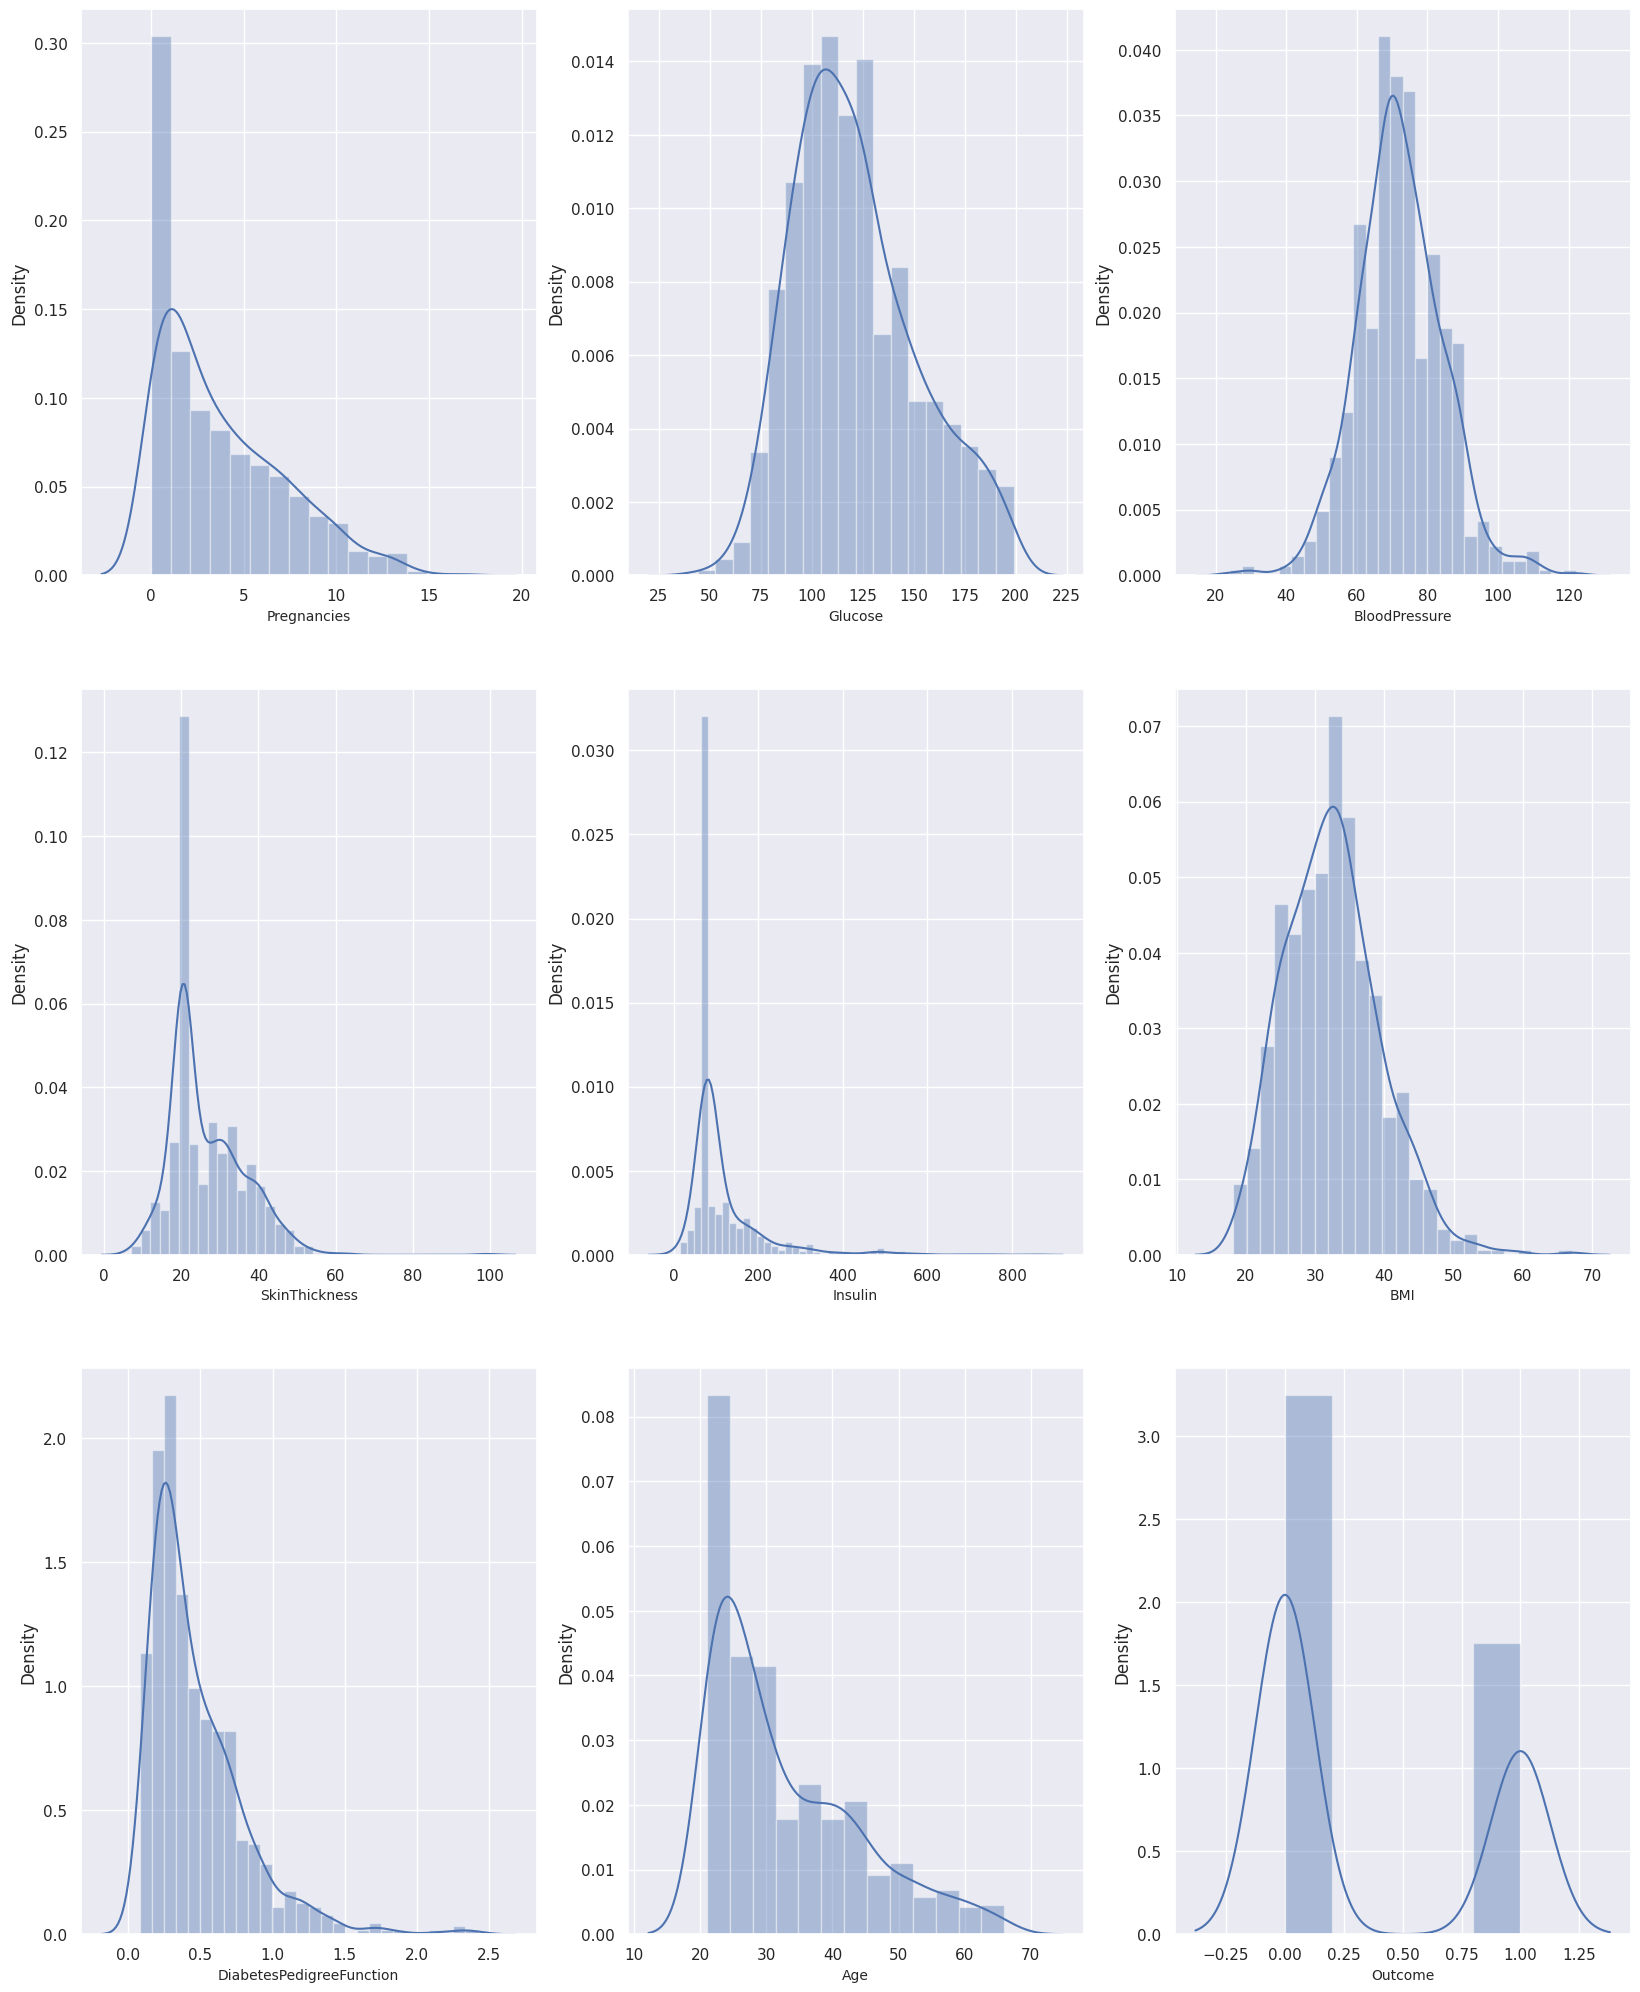

In [16]:
# let's see how data is distributed in each column after cleaning

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_cleaned:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data_cleaned[column])
    plt.xlabel(column, fontsize=10)
  plotnumber+=1
plt.show()

In [19]:
X=data_cleaned.drop(columns=['Outcome'])
y=data_cleaned['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

In [23]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [26]:
# Now check for multicollinearity using VIF(Variance Inflation Factor)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Feature']=X.columns

vif

,vif,Feature
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


All the VIF values are less than 5 and very low. That means no multicollinearity. Now we can go ahead with fitting out data to the model. Before that, let's split our data in test and test set.

# 1. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

or

# 1. VIF score of an independent variable represents how well the variable is explained by other independent variables.

# 2. R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF, which is denoted below:

# 3. VIF formula=1/1-R^2

# 4. So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

# 5. VIF starts at 1 and has no upper limit
# 6. VIF = 1, no correlation between the independent variable and the other variables
# 7. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25, random_state=355)

In [29]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [30]:
model.fit(x_train,y_train)

GaussianNB()

In [31]:
# saving the model

import pickle
with open('ModelForPrediction.sav','wb') as f:
  pickle.dump(model,f)

with open('satandardsclaer.sav','wb') as f:
  pickle.dump(scaler,f)

In [32]:
y_pred=model.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7578947368421053

In [35]:
# Confusion Matrix

confusion=confusion_matrix(y_test,y_pred)

In [36]:
confusion

array([[104,  19],
       [ 27,  40]])

In [37]:
true_positive=confusion[0][0]
false_negative=confusion[0][1]
false_positive=confusion[1][0]
true_negative=confusion[1][1]

In [40]:
# Breaking down the formula for accuracy
Accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)

In [41]:
Accuracy

0.7578947368421053

In [43]:
# precision
Precision=(true_positive)/(true_positive+false_positive)
Precision

0.7938931297709924

In [45]:
# Recall
Recall=(true_positive)/(true_positive+false_negative)
Recall

0.8455284552845529

In [46]:
# F1 Score

F1_score=2*(Recall*Precision)/(Precision+Recall)
F1_score

0.8188976377952755

In [48]:
# Area_Under_Curve

auc=roc_auc_score(y_test,y_pred)
auc

0.7212716903288434

In [49]:
# We will create Logistic regression model nad the compare the AUC of both the model

In [50]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

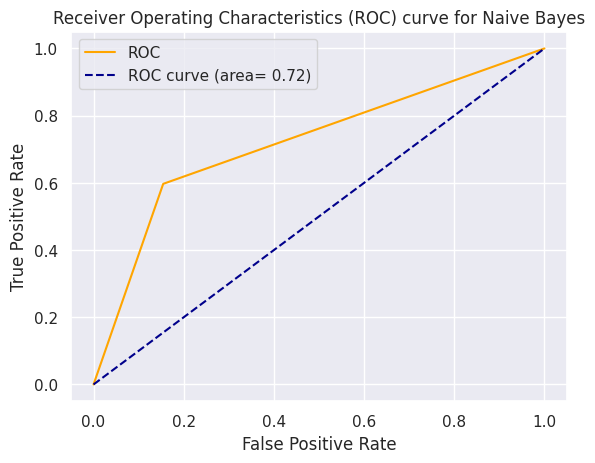

In [59]:
plt.plot(fpr,tpr,color="orange",label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area= %0.2f)' %auc)
plt.title("Receiver Operating Characteristics (ROC) curve for Naive Bayes")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [60]:
# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred_logistic=log_reg.predict(x_test)

In [64]:
accuracy_logistic=accuracy_score(y_test,y_pred_logistic)
accuracy_logistic

0.7631578947368421

In [65]:
# Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred_logistic)
conf_mat

array([[106,  17],
       [ 28,  39]])

In [66]:
fpr_logistic,tpr_logistic,thresholds_logistic=roc_curve(y_test,y_pred_logistic)

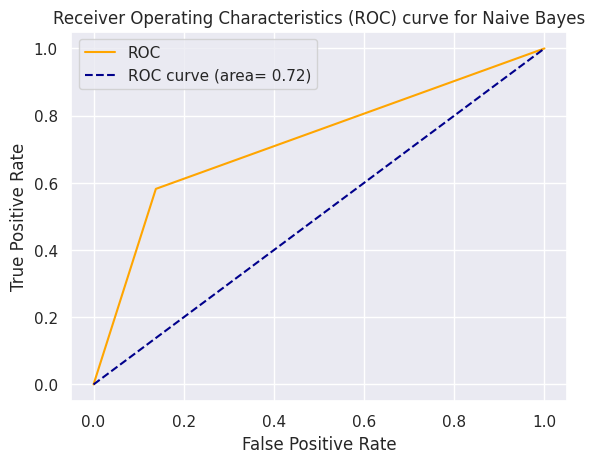

In [67]:
plt.plot(fpr_logistic,tpr_logistic,color="orange",label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area= %0.2f)' %auc)
plt.title("Receiver Operating Characteristics (ROC) curve for Naive Bayes")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [69]:
auc_naive=roc_auc_score(y_test,y_pred)
auc_naive

0.7212716903288434

In [71]:
auc_logistic=roc_auc_score(y_test,y_pred_logistic)
auc_logistic

0.7219390850624925

Here, we can see that the AUC for logisatic regression and naive bayes is almost similar.